## Quick Start

### Download a panorama by coordinates from Google Street View

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.jdata: <pano.GSV_pano object at 0x000002486130FBB0>
Resize zoom-leve 2 to zoom-level 0: ./output\I72NX1gOV6_VkZKA1Z4pwQ_2.jpg
2026-01-10 14:46:58,256 - LOG.file - INFO - get_panorama - 1403 - Found existing panorama: ./output\I72NX1gOV6_VkZKA1Z4pwQ_2.jpg


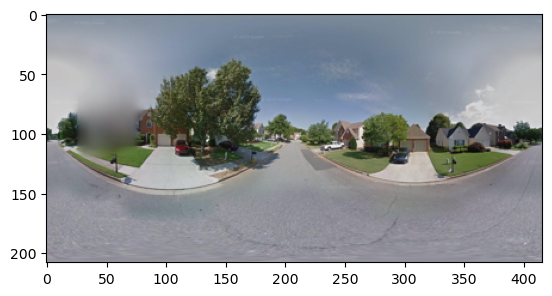

In [8]:
%load_ext autoreload
%autoreload 2

import os
from pano import GSV_pano
import matplotlib.pyplot as plt

# Set your working directory
saved_path = os.getcwd()

# Initialize with latitude and longitude
# pano = GSV_pano(request_lat=34.0332355, request_lon=-84.2425089, saved_path='./output')
pano = GSV_pano(request_lat=34.0718606, request_lon=-84.357893, saved_path='./output')

# pano = GSV_pano(panoId='bqqp1YWfr02XC4s1R577qA', saved_path=saved_path)
 
# Download panorama image (zoom levels: 0-5, higher = more detail)
pano_img = pano.get_panorama(zoom=0)

# show the image
plt.imshow(pano_img['image'])

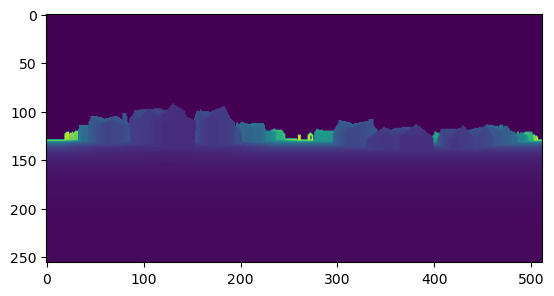

In [9]:
# Get depth map
pano_depth = pano.get_depthmap(zoom=0)

# show the depthMap
plt.imshow(pano_depth['depthMap'])

self.jdata: <pano.GSV_pano object at 0x000002486127BDC0>
Resize zoom-leve 4 to zoom-level 0: ./output\bqqp1YWfr02XC4s1R577qA_4.jpg
2026-01-10 14:47:02,631 - LOG.file - INFO - get_panorama - 1403 - Found existing panorama: ./output\bqqp1YWfr02XC4s1R577qA_4.jpg


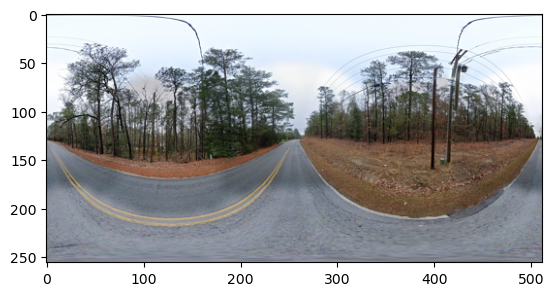

In [10]:
# If you already have a panorama ID
panoId = 'bqqp1YWfr02XC4s1R577qA'
pano = GSV_pano(panoId=panoId, saved_path='./output')
pano_img = pano.get_panorama(zoom=0)

# show the image
plt.imshow(pano_img['image'])

In [15]:
# by JSON file
pano = GSV_pano(json_file='Mo_FV_euTUQ9Rg0m4Tu8IA.json')
pano.jdata  # access the loaded JSON data

{'Data': {'image_width': 16384,
  'image_height': 8192,
  'tile_width': 512,
  'tile_height': 512,
  'level_sizes': [[[256, 512]],
   [[512, 1024]],
   [[1024, 2048]],
   [[2048, 4096]],
   [[4096, 8192]],
   [[8192, 16384]]],
  'image_date': [2021, 9],
  'imagery_type': 1,
  'copyright': '© 2023 Google'},
 'Projection': {'projection_type': 'spherical',
  'pano_yaw_deg': 115.3878173828125,
  'tilt_yaw_deg': 86.78173828125,
  'tilt_pitch_deg': 358.6838989257812},
 'Location': {'panoId': 'Mo_FV_euTUQ9Rg0m4Tu8IA',
  'zoomLevels': '',
  'lat': 40.81622016725702,
  'lng': -77.88762336692993,
  'original_lat': '',
  'original_lng': '',
  'elevation_wgs84_m': '',
  'streetRange': '',
  'country': 'US',
  'region': 'State College, Pennsylvania',
  'elevation_egm96_m': 358.8838195800781,
  'description': '211 Pennwood N'},
 'Links': [{'panoId': 'yHssevrfy8ilNeoG8-ySTA',
   'yawDeg': 294.5221557617188,
   'road_argb': '',
   'description': 'Pennwood N'},
  {'panoId': 'ogrd2M1ICg2cqNHZQlmb6w',
  

## 3D Point Cloud Access

In [ ]:
pano = GSV_pano(json_file='Mo_FV_euTUQ9Rg0m4Tu8IA.json')
point_cloud = pano.get_point_cloud(zoom=4, distance_threshold=50, color=True)

# use open3d to visualize the point cloud
import numpy as np
import open3d as o3d

points = point_cloud["point_cloud"]

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3].astype(np.float64))

# colors are in columns 4..6 when color=True
if points.shape[1] >= 7:
    pcd.colors = o3d.utility.Vector3dVector(points[:, 4:7].astype(np.float64) / 255.0)

o3d.visualization.draw_geometries([pcd])

# needs about 1 miniute to run, the result is shown below

self.jdata: <pano.GSV_pano object at 0x000002486492DD80>


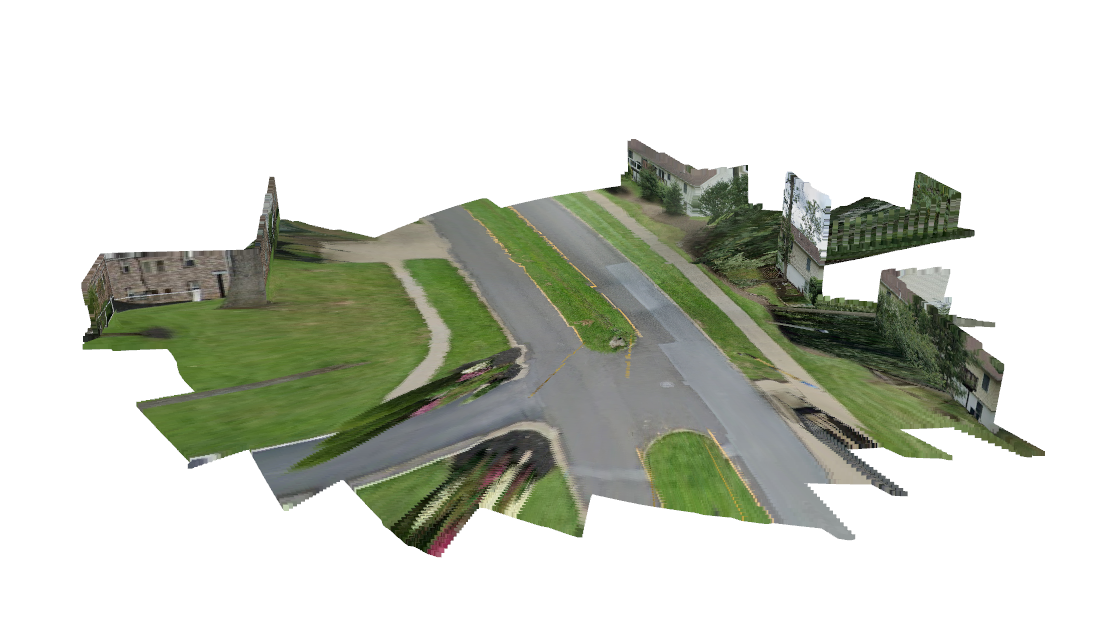

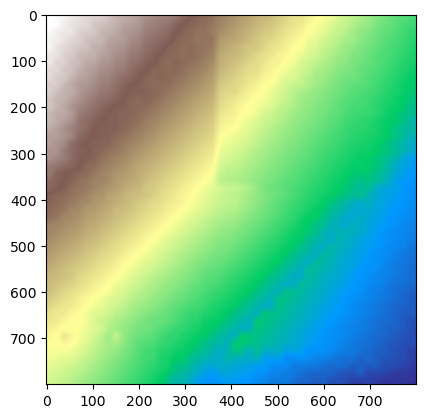

In [54]:
pano.crs_local = 32128  # set local coordinate system, require. This is an example of Pennsylvania state plane, North, meter unit.

pano_DEM = pano.get_DEM(width=40, height=40, resolution=0.05, zoom=1)

# show the DEM
plt.imshow(pano_DEM['DEM'], cmap='terrain')

# Not used below

In [45]:
import unittest
import math
import os
import numpy as np
import time
import glob


# import pptk
import cv2
from pano import GSV_pano
from PIL import Image
import PIL
import shutil
# gsv = GSV_pano()
import matplotlib.pyplot as plt

In [46]:
# move files
files = glob.glob(r'D:\Research\sidewalk_wheelchair\*.json')
to_dir = r'D:\Research\sidewalk_wheelchair\json'


In [ ]:
for idx, f in enumerate(files):
    new_name = os.path.join(to_dir, os.path.basename(f))
#     print(new_name)
    shutil.move(f, new_name)
    if idx % 1000 == 0:
        print(idx, new_name)

In [ ]:
seg_file = r'--69cR9y-yjGxq3c-uPBRw.png'

panoId = seg_file[:-4]

saved_path = r'D:\Code\StreetView\gsv_pano\test_results'

pano1 = GSV_pano(panoId=panoId, crs_local=6487, saved_path=saved_path)


In [ ]:
seg_file = r'--69cR9y-yjGxq3c-uPBRw.png'
panoId = seg_file[:-4]
saved_path = r'D:\Code\StreetView\gsv_pano\test_results'

rows_offset = 2048
cols_offset = 0
zoom = 4

pil_img = Image.open(seg_file)

pano1 = GSV_pano(panoId=panoId, crs_local=6487, saved_path=saved_path)

# DOM = pano1.get_DOM(zoom=4, resolution=0.05, fill_clipped_seg=True)

target_ids = [12]
np_img = np.array(pil_img)

np_img_binary = np.zeros(np_img.shape)
for i in target_ids:
    np_img_binary = np.logical_or(np_img_binary, np_img == i)

np_img_binary = np_img_binary.astype(np.uint8)

# cv2_opened = np.where(cv2_opened == 0, 0, 255).astype(np.uint8)

# opened_color = cv2.merge((cv2_opened, cv2_opened, cv2_opened))

morph_kernel_open  = (10, 10)
morph_kernel_close = (20, 20)
g_close = cv2.getStructuringElement(cv2.MORPH_RECT, morph_kernel_close)
g_open  = cv2.getStructuringElement(cv2.MORPH_RECT, morph_kernel_open)

cv2_img_closed = cv2.morphologyEx(np_img_binary, cv2.MORPH_CLOSE, g_close) # fill small gaps
cv2_img_opened = cv2.morphologyEx(cv2_img_closed, cv2.MORPH_OPEN, g_open)

raw_contours, hierarchy = cv2.findContours(cv2_img_opened.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv_img_color = cv2.cvtColor(np_img, cv2.COLOR_GRAY2BGR)
# cv2.drawContours(cv_img_color, raw_contours, )
cv_img_con = cv2.drawContours(cv_img_color, raw_contours[18:19], -1, (0, 255, 0), 2)

# contours = [np.squeeze(cont) for cont in raw_contours[18:19]]
contours = [np.squeeze(cont) for cont in raw_contours[:]]


for idx, contour in enumerate(contours):
    cols = contour[:, 0] + cols_offset
    rows = contour[:, 1] + rows_offset
    contour_points = pano1.col_row_to_points(cols, rows, zoom=zoom)
    print("contour_points:", contour_points)

    for x, y in zip(contour_points[:, 0] + 20,  20-contour_points[:, 1]):
        cv2.circle(cv_img_con, (int(x*30), int(y*30)), 2, (0, 255, 0), 2)

win_name = "opencv"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
cv2.moveWindow(win_name, 100, 100)
cv2.imshow(win_name, cv_img_con)
cv2.resizeWindow(win_name, 1600, 200)
cv2.waitKey(0)


In [ ]:
def degree_difference(angle1, angle2):
    diff = abs(angle1 - angle2) % 360
    if diff > 180:
        diff = 360 - diff
    return diff

degree_difference(230, 1)